In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
import psutil


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = 'Energy_Data.csv'
df = pd.read_csv(data)

In [4]:
df.head()


,dtm,MIP,Solar_MW,Solar_capacity_mwp,Solar_installedcapacity_mwp,Wind_MW,SS_Price,boa_MWh,DA_Price
0,2020-09-20T00:00:00Z,20.06,0.0,2130.537493,2228.208777,996.284,2.50,0.0,32.17
1,2020-09-20T00:30:00Z,19.77,0.0,2130.537493,2228.208777,957.576,15.00,0.0,32.17
2,2020-09-20T01:00:00Z,28.68,0.0,2130.537493,2228.208777,941.044,47.95,0.0,32.00
3,2020-09-20T01:30:00Z,28.97,0.0,2130.537493,2228.208777,964.366,29.13,0.0,32.00
4,2020-09-20T02:00:00Z,28.19,0.0,2130.537493,2228.208777,918.432,28.95,0.0,31.99


In [5]:
col_names = df.columns
print(col_names)

Index(['dtm', 'MIP', 'Solar_MW', 'Solar_capacity_mwp',
       'Solar_installedcapacity_mwp', 'Wind_MW', 'SS_Price', 'boa_MWh',
       'DA_Price'],
      dtype='object')


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58368 entries, 0 to 58367
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   dtm                          58368 non-null  object 
 1   MIP                          57944 non-null  float64
 2   Solar_MW                     58293 non-null  float64
 3   Solar_capacity_mwp           58368 non-null  float64
 4   Solar_installedcapacity_mwp  58368 non-null  float64
 5   Wind_MW                      58265 non-null  float64
 6   SS_Price                     58368 non-null  float64
 7   boa_MWh                      58265 non-null  float64
 8   DA_Price                     58368 non-null  float64
dtypes: float64(8), object(1)
memory usage: 4.0+ MB


In [21]:
# print des valeurs null "
print(df.isna().sum())

dtm                              0
MIP                            424
Solar_MW                        75
Solar_capacity_mwp               0
Solar_installedcapacity_mwp      0
Wind_MW                        103
SS_Price                         0
boa_MWh                        103
DA_Price                         0
dtype: int64


In [19]:
df['Wind_MW'].unique()


array([ 996.284,  957.576,  941.044, ..., 1154.56 , 1167.66 , 1011.84 ])

In [24]:
# Define a list of values to check for
values_to_check = [0, np.nan]

# Check for values equal to 0 or null
is_zero_or_null = df.isin(values_to_check)

# Display the number of values equal to 0 or null in each column
print("Number of values equal to 0 or null in each column:")
print(is_zero_or_null.sum())

Number of values equal to 0 or null in each column:
dtm                                0
MIP                              507
Solar_MW                       28449
Solar_capacity_mwp                 0
Solar_installedcapacity_mwp        0
Wind_MW                         3434
SS_Price                         598
boa_MWh                        57625
DA_Price                          16
dtype: int64


In [26]:
# Display the rows with values equal to 0 or null
print("\nRows with values equal to 0 or null:")
print(df[is_zero_or_null.any(axis=1)])


Rows with values equal to 0 or null:
                        dtm    MIP  Solar_MW  Solar_capacity_mwp  \
0      2020-09-20T00:00:00Z  20.06       0.0         2130.537493   
1      2020-09-20T00:30:00Z  19.77       0.0         2130.537493   
2      2020-09-20T01:00:00Z  28.68       0.0         2130.537493   
3      2020-09-20T01:30:00Z  28.97       0.0         2130.537493   
4      2020-09-20T02:00:00Z  28.19       0.0         2130.537493   
...                     ...    ...       ...                 ...   
58363  2024-01-18T21:30:00Z  71.24       0.0         2448.407255   
58364  2024-01-18T22:00:00Z  70.15       0.0         2448.407255   
58365  2024-01-18T22:30:00Z  68.36       0.0         2448.407255   
58366  2024-01-18T23:00:00Z  68.77       0.0         2448.407255   
58367  2024-01-18T23:30:00Z  59.36       0.0         2448.350098   

       Solar_installedcapacity_mwp   Wind_MW  SS_Price  boa_MWh  DA_Price  
0                      2228.208777   996.284   2.50000      0.0     3

In [27]:

# conversion en datetime pour dtm qui était un objet 
df['dtm'] = pd.to_datetime(df['dtm'], format='%Y-%m-%dT%H:%M:%SZ')


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58368 entries, 0 to 58367
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   dtm                          58368 non-null  datetime64[ns]
 1   MIP                          57944 non-null  float64       
 2   Solar_MW                     58293 non-null  float64       
 3   Solar_capacity_mwp           58368 non-null  float64       
 4   Solar_installedcapacity_mwp  58368 non-null  float64       
 5   Wind_MW                      58265 non-null  float64       
 6   SS_Price                     58368 non-null  float64       
 7   boa_MWh                      58265 non-null  float64       
 8   DA_Price                     58368 non-null  float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 4.0 MB


In [32]:
df.head()

,dtm,MIP,Solar_MW,Solar_capacity_mwp,Solar_installedcapacity_mwp,Wind_MW,SS_Price,boa_MWh,DA_Price
0,2020-09-20 00:00:00,20.06,0.0,2130.537493,2228.208777,996.284,2.50,0.0,32.17
1,2020-09-20 00:30:00,19.77,0.0,2130.537493,2228.208777,957.576,15.00,0.0,32.17
2,2020-09-20 01:00:00,28.68,0.0,2130.537493,2228.208777,941.044,47.95,0.0,32.00
3,2020-09-20 01:30:00,28.97,0.0,2130.537493,2228.208777,964.366,29.13,0.0,32.00
4,2020-09-20 02:00:00,28.19,0.0,2130.537493,2228.208777,918.432,28.95,0.0,31.99


In [33]:
# Ajouter des colonnes pour le jour, le mois, l'annéé et l'heure 
df['day'] = df['dtm'].dt.day
df['month'] = df['dtm'].dt.month
df['year'] = df['dtm'].dt.year
df['hour'] = df['dtm'].dt.hour

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58368 entries, 0 to 58367
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   dtm                          58368 non-null  datetime64[ns]
 1   MIP                          57944 non-null  float64       
 2   Solar_MW                     58293 non-null  float64       
 3   Solar_capacity_mwp           58368 non-null  float64       
 4   Solar_installedcapacity_mwp  58368 non-null  float64       
 5   Wind_MW                      58265 non-null  float64       
 6   SS_Price                     58368 non-null  float64       
 7   boa_MWh                      58265 non-null  float64       
 8   DA_Price                     58368 non-null  float64       
 9   day                          58368 non-null  int64         
 10  month                        58368 non-null  int64         
 11  year                         58368 non-nu

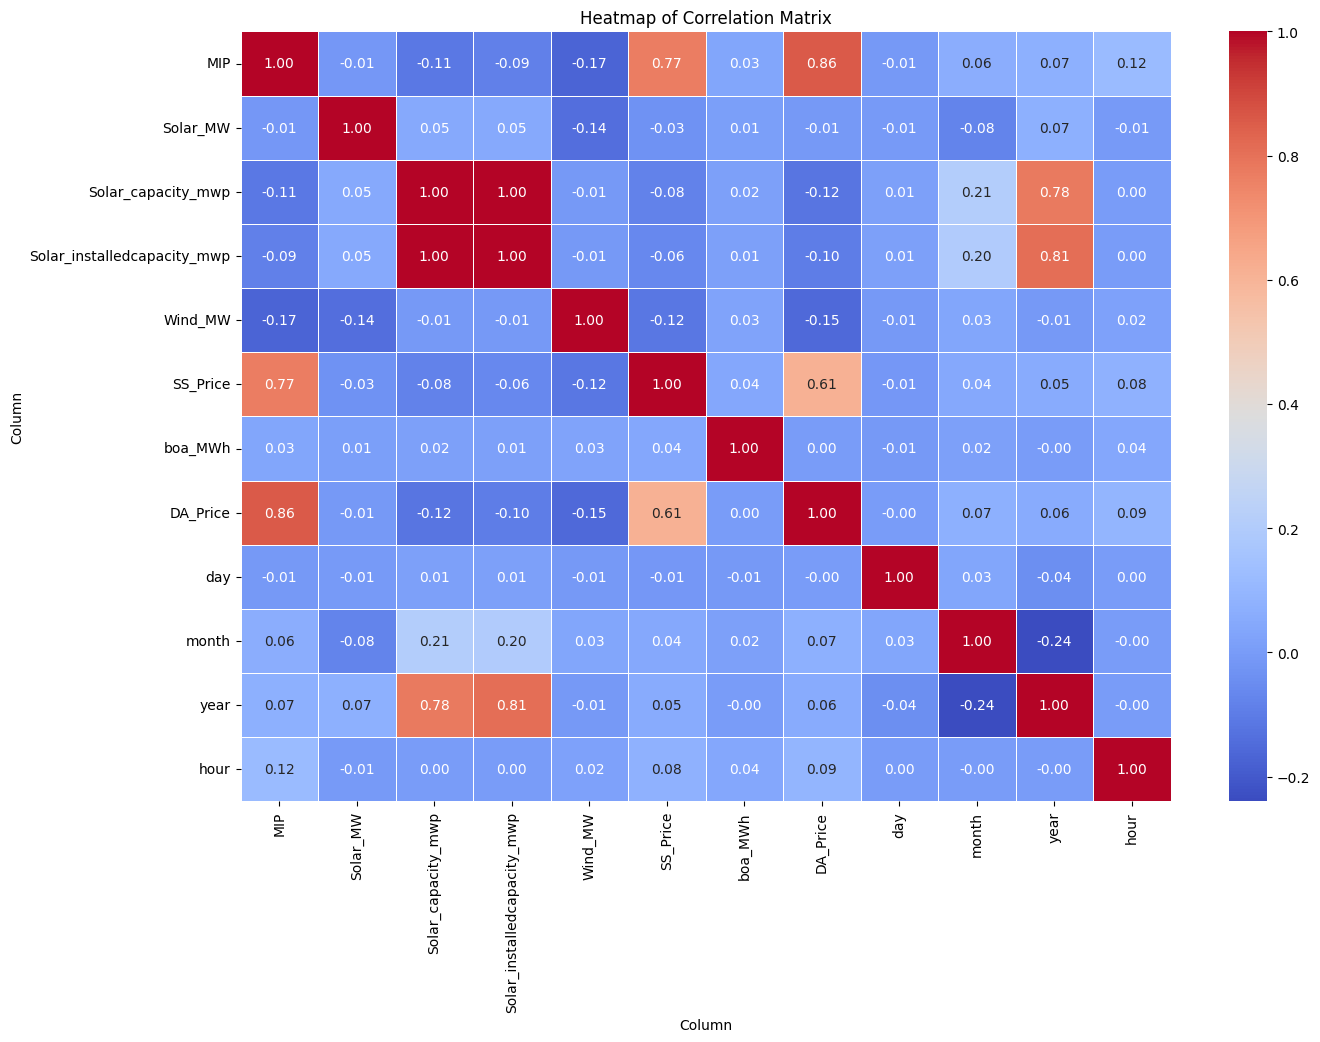

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr_matrix = df.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5, linecolor='white')

# Set the title and labels for the plot
plt.title('Heatmap of Correlation Matrix')
plt.xlabel('Column')
plt.ylabel('Column')

# Show the plot
plt.show()